In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import time
import planarity
from networkx.algorithms import community
import make_mst
import make_pmfg

In [2]:
raw_data = pd.read_csv('cleaned_data.csv',index_col=0)
one_month = raw_data[raw_data['month']=='2020-11']

In [4]:
distance_graph = make_mst.get_graph_distance('2010-11')
print('# of nodes', nx.number_of_nodes(distance_graph))

# of nodes 63


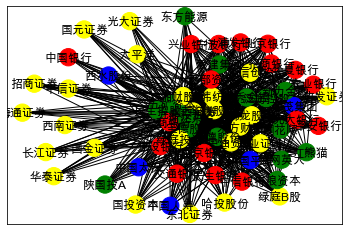

In [6]:
## original network
color = []
color_map = dict(distance_graph.nodes)
# print(color_map)
for node in color_map.items():
    # print(node)
    color.append(node[1]['color'])
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
nx.draw_networkx(distance_graph,node_color=color)


{'宝德股份': {'color': 'green'}, '东方财富': {'color': 'yellow'}, '华夏银行': {'color': 'red'}, '农业银行': {'color': 'red'}, '天茂集团': {'color': 'blue'}, '海通证券': {'color': 'yellow'}, '中国人寿': {'color': 'blue'}, '五矿资本': {'color': 'green'}, '绿庭B股': {'color': 'yellow'}, '中国平安': {'color': 'blue'}, '山西证券': {'color': 'yellow'}, '九鼎投资': {'color': 'green'}, '绿庭投资': {'color': 'yellow'}, '西南证券': {'color': 'yellow'}, '招商证券': {'color': 'yellow'}, '光大证券': {'color': 'yellow'}, '国元证券': {'color': 'yellow'}, '工商银行': {'color': 'red'}, '海德股份': {'color': 'green'}, '太平洋': {'color': 'yellow'}, '长江证券': {'color': 'yellow'}, '哈投股份': {'color': 'yellow'}, '同花顺': {'color': 'green'}, '*ST熊猫': {'color': 'green'}, '陕国投A': {'color': 'green'}, '鲁信创投': {'color': 'yellow'}, '宁波银行': {'color': 'red'}, '东北证券': {'color': 'yellow'}, '中国银行': {'color': 'red'}, '交通银行': {'color': 'red'}, '中信证券': {'color': 'yellow'}, '浦发银行': {'color': 'red'}, '兴业证券': {'color': 'yellow'}, '国投资本': {'color': 'yellow'}, '越秀金控': {'color': 'green'}, '中油资本': {'color': 'y

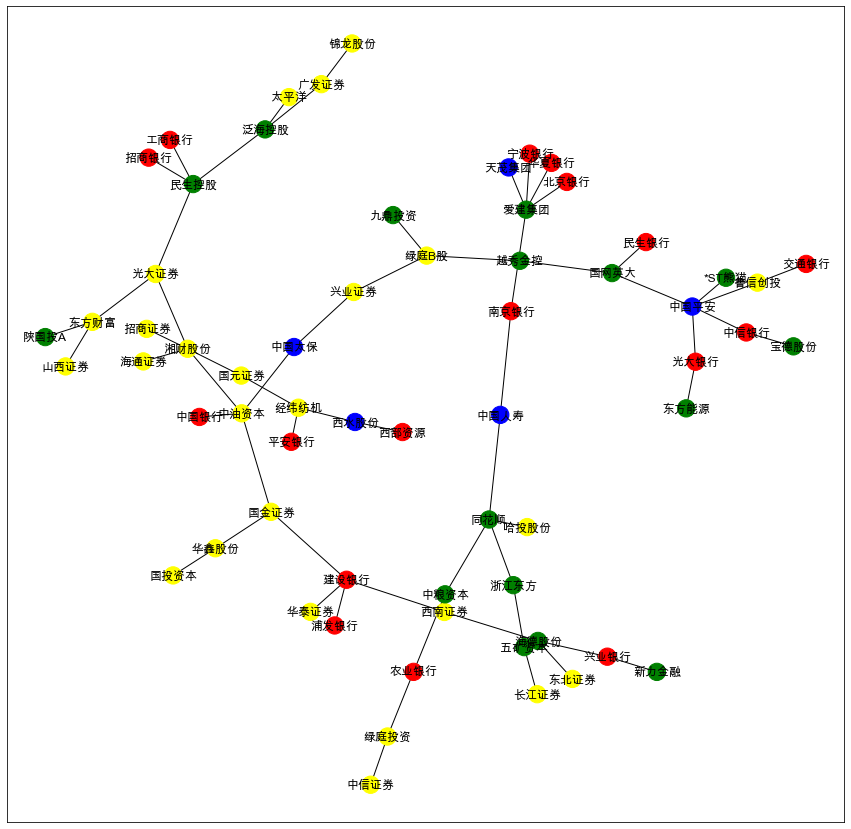

In [16]:
### MST

mst = nx.minimum_spanning_tree(distance_graph)
node_list = list(mst.nodes())
# print(node_list,type(node_list))

for i in range(len(node_list)):
    # print(node_list[i])
    if one_month[one_month['简称']==node_list[i]].iloc[0]['subsector'] == '资本市场服务':
        mst.nodes[node_list[i]]['color'] ='yellow'
    elif one_month[one_month['简称']==node_list[i]].iloc[0]['subsector'] == '保险业':
        mst.nodes[node_list[i]]['color'] ='blue'
    elif one_month[one_month['简称']==node_list[i]].iloc[0]['subsector'] == '货币金融':
        mst.nodes[node_list[i]]['color'] ='red'
    elif one_month[one_month['简称']==node_list[i]].iloc[0]['subsector'] == '其他金融业':
        mst.nodes[node_list[i]]['color'] ='green'
color = []
color_map = dict(mst.nodes)
print(color_map)
for node in color_map.items():
    color.append(node[1]['color'])
plt.figure(figsize=(15,15))
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
nx.draw_networkx(mst,node_color=color)


In [10]:
corr_graph = make_mst.get_graph_corr('2010-11')
#  = make_mst.get_graph_corr(G)
pmfg = make_pmfg.compute_PMFG(corr_graph)

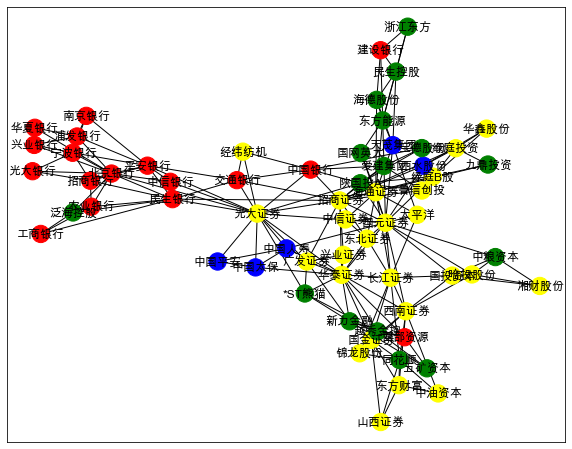

In [15]:
node_list = list(pmfg.nodes())
# print(node_list,type(node_list))

for i in range(len(node_list)):
    # print(node_list[i])
    if one_month[one_month['简称']==node_list[i]].iloc[0]['subsector'] == '资本市场服务':
        pmfg.nodes[node_list[i]]['color'] ='yellow'
    elif one_month[one_month['简称']==node_list[i]].iloc[0]['subsector'] == '保险业':
        pmfg.nodes[node_list[i]]['color'] ='blue'
    elif one_month[one_month['简称']==node_list[i]].iloc[0]['subsector'] == '货币金融':
        pmfg.nodes[node_list[i]]['color'] ='red'
    elif one_month[one_month['简称']==node_list[i]].iloc[0]['subsector'] == '其他金融业':
        pmfg.nodes[node_list[i]]['color'] ='green'
color = []
color_map = dict(pmfg.nodes)
# print(color_map)
for node in color_map.items():
    # print(node)
    color.append(node[1]['color'])
plt.figure(figsize=(10,8))
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
nx.draw_networkx(pmfg,node_color=color)